In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
base_path = "data"

data = []

for category in os.listdir(base_path):
    category_path = os.path.join(base_path, category)

    if os.path.isdir(category_path):
        inner_folder = os.path.join(category_path, category)

        if os.path.isdir(inner_folder):
            for file in os.listdir(inner_folder):
                if file.endswith(".txt"):
                    file_path = os.path.join(inner_folder, file)

                    with open(file_path, "r", encoding="utf-8") as f:
                        text = f.read()

                    data.append([text, category])


In [4]:
df = pd.DataFrame(data, columns=["text", "label"])

print(df.shape)
df.head()

(10000, 2)


,text,label
0,"घर जग्गा कारोबारमा आत्मविश्वास गुमेको वर्ष""बैं...",ArthaBanijya
1,सहायताको प्राथमिकता तोक्न आयोजना बैंकप्राथमिकत...,ArthaBanijya
2,व्यापारीको बेइमानीले सर्वसाधारणलाई सास्तीपेट्र...,ArthaBanijya
3,मोबाइल सेट आयातमा टाइप एप्रुभल लागूसरकारले मोब...,ArthaBanijya
4,रारामा रिसोर्ट र पर्यटक सेवा केन्द्र बन्नेदेश...,ArthaBanijya


In [5]:
df['label'].value_counts()

label
ArthaBanijya       1000
Bichar             1000
Desh               1000
Khelkud            1000
Manoranjan         1000
Prabas             1000
Sahitya            1000
SuchanaPrabidhi    1000
Swasthya           1000
Viswa              1000
Name: count, dtype: int64

In [6]:
x= df['text']
y= df['label']

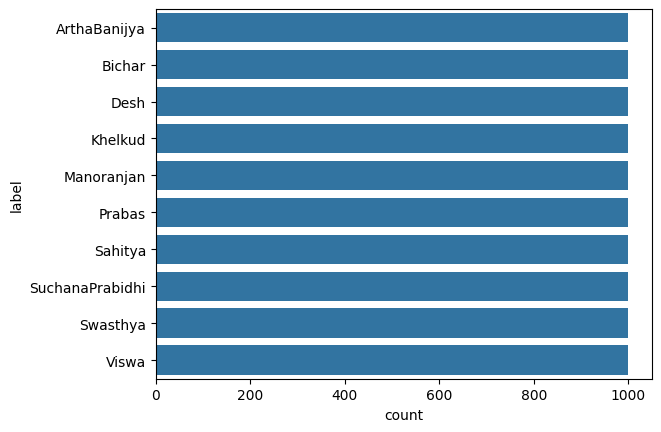

In [9]:
sns.countplot(df['label'])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.sample(7)

278     भारतले नेपाललाई दिने सहयोग  प्रतिशत बढायोभारतल...
7268    \n﻿काठमाडौँ  ताम्राकार कम्प्लेक्सको सातौँ वार्...
1291    नेतृत्वसंविधान डटकमडा बाबुराम भट्टराई नेतृत्वक...
4095    "तान्यो चपली हाइटले एकै दिन  लाख"शुक्रबारदेखि ...
2565    जहाँ छिर्न टिकट काट्नुपर्छ"नेपालमा कृषि पर्यटन...
1745    सुडान काण्ड प्रहरीको नमेटिने दागबहुचर्चित र कठ...
3010     रुपन्देहीविरुद्व अफ्रिकनको कठिन जित अफ्रिकन य...
Name: text, dtype: object

In [12]:
x_train.shape

(8000,)

In [13]:
y_train.shape

(8000,)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [15]:
new_model = make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
new_model.fit(x_train,y_train)
y_preds = new_model.predict(x_test)

In [16]:
accuracy_score(y_test,y_preds)*100

72.39999999999999

In [17]:
print(classification_report(y_test,y_preds))

                 precision    recall  f1-score   support

   ArthaBanijya       0.75      0.81      0.78       208
         Bichar       0.38      0.99      0.55       202
           Desh       0.92      0.53      0.67       192
        Khelkud       0.98      0.91      0.94       201
     Manoranjan       0.72      0.62      0.67       209
         Prabas       0.84      0.61      0.71       186
        Sahitya       0.72      0.56      0.63       211
SuchanaPrabidhi       0.97      0.73      0.83       204
       Swasthya       0.93      0.83      0.88       212
          Viswa       0.84      0.62      0.71       175

       accuracy                           0.72      2000
      macro avg       0.80      0.72      0.74      2000
   weighted avg       0.80      0.72      0.74      2000



In [20]:
cm =confusion_matrix(y_test,y_preds)
cm

array([[168,  27,   5,   1,   0,   4,   0,   3,   0,   0],
       [  1, 200,   0,   0,   1,   0,   0,   0,   0,   0],
       [ 17,  55, 102,   0,   1,   7,   1,   0,   5,   4],
       [  4,  11,   0, 183,   0,   0,   0,   0,   0,   3],
       [  1,  33,   0,   1, 129,   3,  39,   0,   1,   2],
       [  7,  43,   1,   1,   5, 114,   4,   2,   3,   6],
       [  0,  53,   1,   0,  38,   0, 119,   0,   0,   0],
       [ 18,  25,   0,   1,   1,   4,   1, 148,   1,   5],
       [  5,  25,   1,   0,   0,   2,   1,   0, 177,   1],
       [  4,  54,   1,   0,   3,   1,   0,   0,   4, 108]])

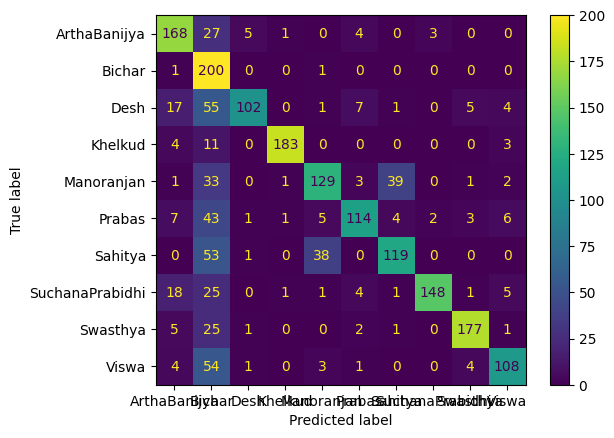

In [21]:
cm_plot = ConfusionMatrixDisplay(
    confusion_matrix=cm , display_labels=df['label'].unique()
)
cm_plot.plot()
plt.show()

In [22]:
sample_data  = [df['text'][447]]
sample_data

['पेट्रोलियम खरिद सम्झौता गर्न आइओसी प्रतिनिधि आउनेपेट्रोलियम पदार्थ खरिदसम्बन्धी नयाँ सम्झौता गर्न भारतीय आयल निगम आइओसी को  सदस्यीय टोली शुक्रबार नेपाल आउने भएको छ  "\n\tपेट्रोलियम पदार्थ खरिदसम्बन्धी नयाँ सम्झौता गर्न भारतीय आयल निगम आइओसी को  सदस्यीय टोली शुक्रबार नेपाल आउने भएको छ   \n\tबजार निर्देशक एम नेनेको नेतृत्वमा सम्झौता गर्न आइओसीको टोली नेपाल आउने निगमले जनाएको छ  सम्झौतामा हस्ताक्षर गर्न शुक्रबार आइओसीको टोली नेपाल आउने भएको छ निगमका कामु कार्यकारी निर्देशक सुरेशकुमार अग्रवालले भने सम्भवतः शुक्रबार नै नयाँ सम्झौतामा हस्ताक्षर हुन्छ   \n\tनिगम र आइओसीबीच भएको अघिल्लो पेट्रोलियम खरिद सम्झौताको अवधि गत चैत  गते सकिएको थियो  उक्त  वर्षे सम्झौतामा अवधि सकिएको  महिनासम्म त्यही सम्झौता अनुसार पेट्रोलियम खरिद गर्न मिल्ने प्रावधान छ  हाल निगमले त्यही प्रावधान अनुसार पेट्रोलियम खरिद गरिरहेको छ   \n\tनिगम र आइओसीका अधिकारीले तीन साताअघि नयाँ सम्झौताको मस्यौदालाई अन्तिम रूप दिएका थिए  उक्त मस्यौदालाई निगम सञ्चालक समितिले तत्काल पारित गरेको थियो भने आइओसीले आफ्नो बोर्डबाट पारित गराउन

In [23]:
new_model.predict(sample_data)

array(['ArthaBanijya'], dtype='<U15')

In [24]:
import joblib
joblib.dump(new_model,'new_model.joblib')
print("success")

success
